In [14]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
import microhapdb
import numpy
import seaborn

In [2]:
m = microhapdb.markers.copy()
m['Start'] = m.Offsets.apply(lambda x: min(map(int, x.split(','))))
m['End'] = m.Offsets.apply(lambda x: max(map(int, x.split(','))) + 1)
m['Length'] = m.apply(lambda x: x.End - x.Start, axis=1)

Text(0, 0.5, 'Frequency')

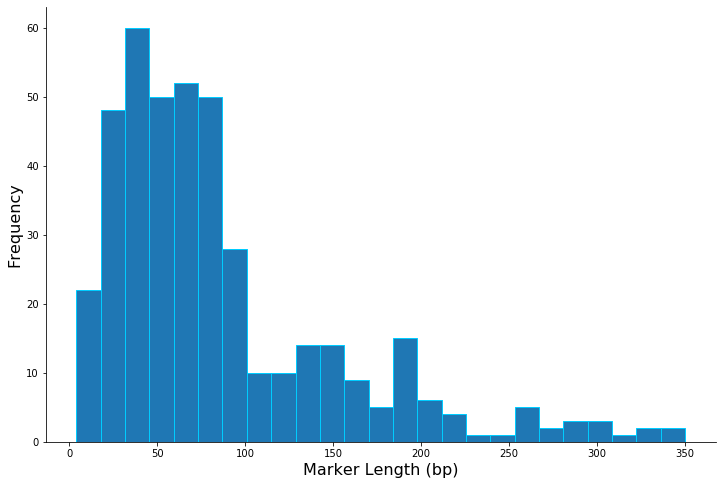

In [3]:
fig = plt.figure(figsize=(12, 8))
fig.patch.set_facecolor('white')
plt.hist(m.Length, bins=25, edgecolor='#00ccff')
axis = plt.gca()
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)
axis.set_xlabel('Marker Length (bp)', fontsize=16)
axis.set_ylabel('Frequency', fontsize=16)

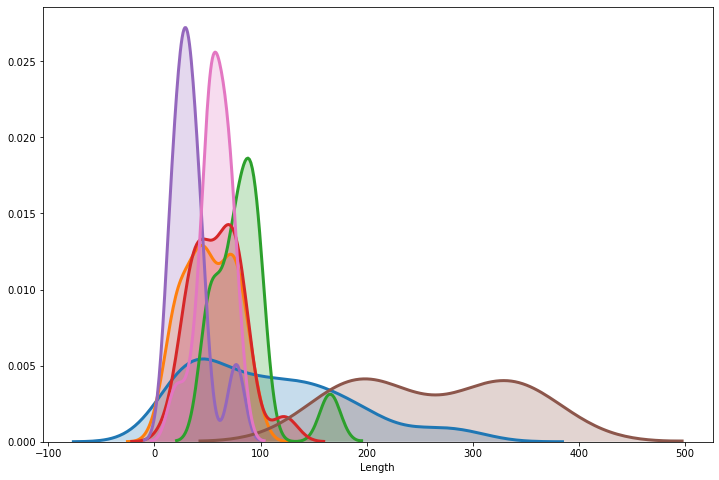

In [4]:
fig = plt.figure(figsize=(12, 8))
for src in m.Source.unique():
    subset = m[m.Source == src]
    seaborn.distplot(subset.Length, hist=False, kde=True,
                     kde_kws={'shade': True, 'linewidth': 3})

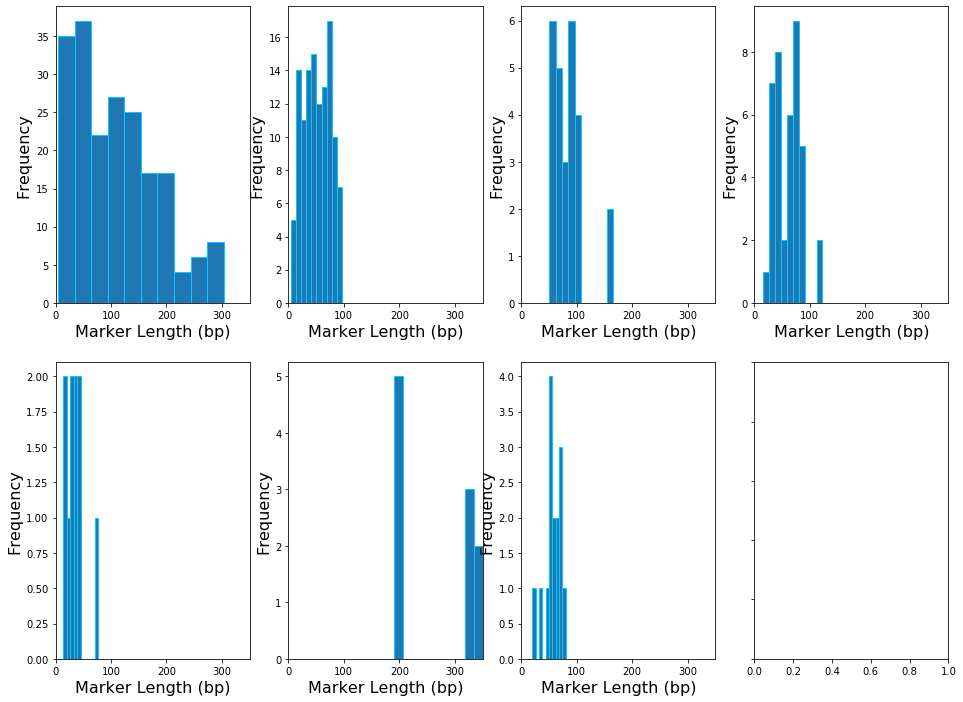

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=4, sharey=True, figsize=(16, 12))
for n, src in enumerate(m.Source.unique()):
    axis = plt.subplot(2, 4, n + 1)
    subset = m[m.Source == src]
    axis.hist(subset.Length, edgecolor='#00ccff')
    axis.set_xlim((0, 350))
    axis.set_xlabel('Marker Length (bp)', fontsize=16)
    axis.set_ylabel('Frequency', fontsize=16)

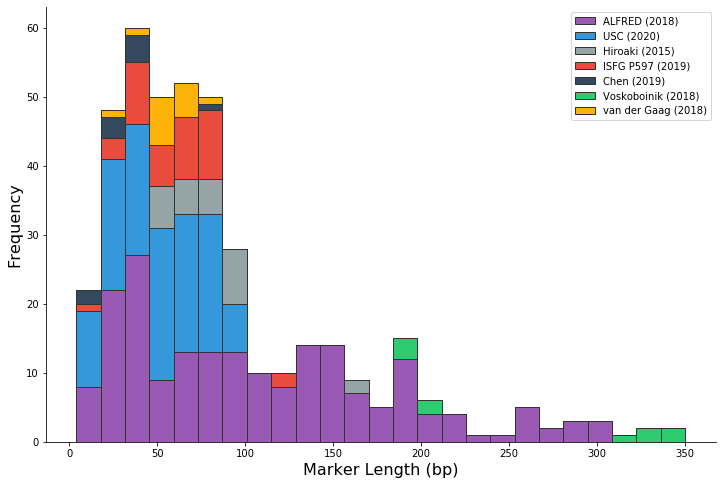

In [11]:
sources = m.Source.unique()
labels = {
    'ALFRED': 'ALFRED (2018)',
    '10.1016/j.fsigen.2019.02.018': 'Chen (2019)',
    '10.1016/j.legalmed.2015.06.003': 'Hiroaki (2015)',
    '10.1016/j.fsigen.2019.102213': 'USC (2020)',
    'ISFG2019:P597': 'ISFG P597 (2019)',
    '10.1016/j.fsigen.2018.05.008': 'van der Gaag (2018)',
    '10.1016/j.fsigen.2018.05.001': 'Voskoboinik (2018)'
}
colors = [
    '#9b59b6',
    '#3498db',
    '#95a5a6',
    '#e74c3c',
    '#34495e',
    '#2ecc71',
    '#feb308',
]
subsets = [m[m.Source == src] for src in sources]
fig = plt.figure(figsize=(12, 8))
fig.patch.set_facecolor('white')
plt.hist([ss.Length for ss in subsets], color=colors, edgecolor='#333333', bins=25, stacked=True, label=[labels[src] for src in sources])
axis = plt.gca()
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)
axis.set_xlabel('Marker Length (bp)', fontsize=16)
axis.set_ylabel('Frequency', fontsize=16)
axis.legend()
fig.savefig('mh-lengths.pdf')

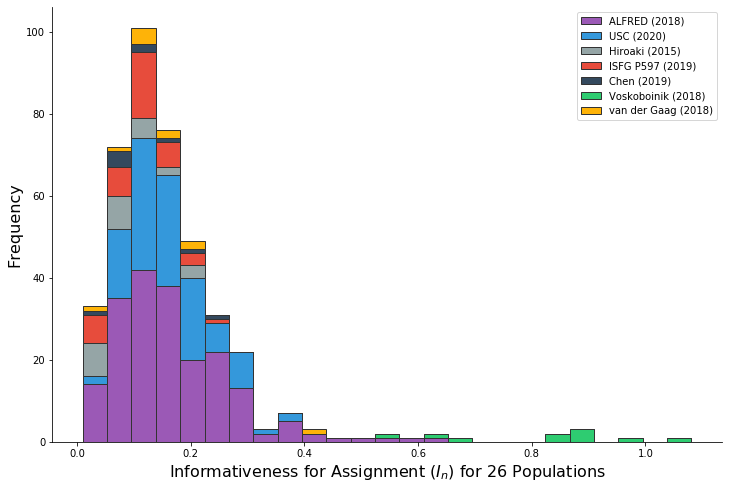

In [12]:
sources = m.Source.unique()
labels = {
    'ALFRED': 'ALFRED (2018)',
    '10.1016/j.fsigen.2019.02.018': 'Chen (2019)',
    '10.1016/j.legalmed.2015.06.003': 'Hiroaki (2015)',
    '10.1016/j.fsigen.2019.102213': 'USC (2020)',
    'ISFG2019:P597': 'ISFG P597 (2019)',
    '10.1016/j.fsigen.2018.05.008': 'van der Gaag (2018)',
    '10.1016/j.fsigen.2018.05.001': 'Voskoboinik (2018)'
}
colors = [
    '#9b59b6',
    '#3498db',
    '#95a5a6',
    '#e74c3c',
    '#34495e',
    '#2ecc71',
    '#feb308',
]
subsets = [m[m.Source == src] for src in sources]
fig = plt.figure(figsize=(12, 8))
fig.patch.set_facecolor('white')
plt.hist([ss.In for ss in subsets], color=colors, edgecolor='#333333', bins=25, stacked=True, label=[labels[src] for src in sources])
axis = plt.gca()
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)
axis.set_xlabel('Informativeness for Assignment ($I_n$)', fontsize=16)
axis.set_ylabel('Frequency', fontsize=16)
axis.legend()
fig.savefig('mh-in.pdf')

/Users/daniel.standage/anaconda3/envs/microhapulator/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


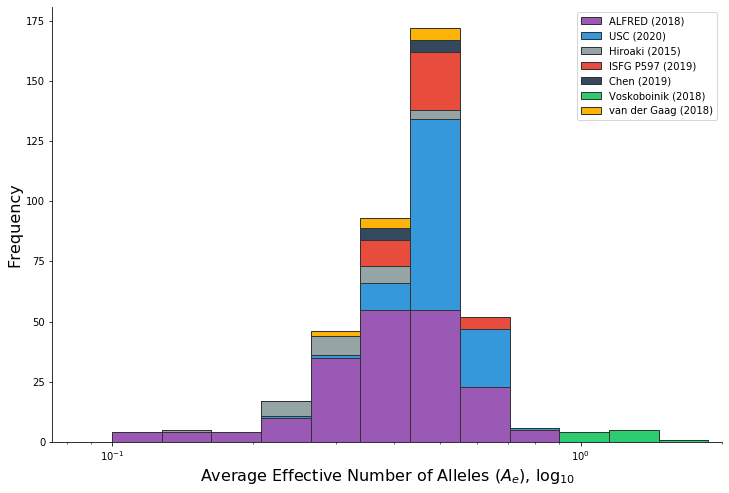

In [34]:
sources = m.Source.unique()
labels = {
    'ALFRED': 'ALFRED (2018)',
    '10.1016/j.fsigen.2019.02.018': 'Chen (2019)',
    '10.1016/j.legalmed.2015.06.003': 'Hiroaki (2015)',
    '10.1016/j.fsigen.2019.102213': 'USC (2020)',
    'ISFG2019:P597': 'ISFG P597 (2019)',
    '10.1016/j.fsigen.2018.05.008': 'van der Gaag (2018)',
    '10.1016/j.fsigen.2018.05.001': 'Voskoboinik (2018)'
}
colors = [
    '#9b59b6',
    '#3498db',
    '#95a5a6',
    '#e74c3c',
    '#34495e',
    '#2ecc71',
    '#feb308',
]
subsets = [m[m.Source == src] for src in sources]
fig = plt.figure(figsize=(12, 8))
fig.patch.set_facecolor('white')
thebins = numpy.logspace(numpy.log10(0.1), numpy.log10(35), 25)
plt.hist([numpy.log10(ss.AvgAe) for ss in subsets], bins=thebins, color=colors, edgecolor='#333333', stacked=True, label=[labels[src] for src in sources])
axis = plt.gca()
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)
axis.set_xscale('log')
axis.set_xlim((0, 2))
axis.set_xlabel('Average Effective Number of Alleles ($A_e$), $\log_{10}$', fontsize=16)
#xticks = (0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5)
#xticklabels = [10 ** n for n in xticks]
#axis.set_xticks(xticks)
#axis.set_xticklabels(xticklabels)
axis.set_ylabel('Frequency', fontsize=16)
axis.legend()
fig.savefig('mh-ae-log10.pdf')

In [31]:
numpy.log10(100)

2.0

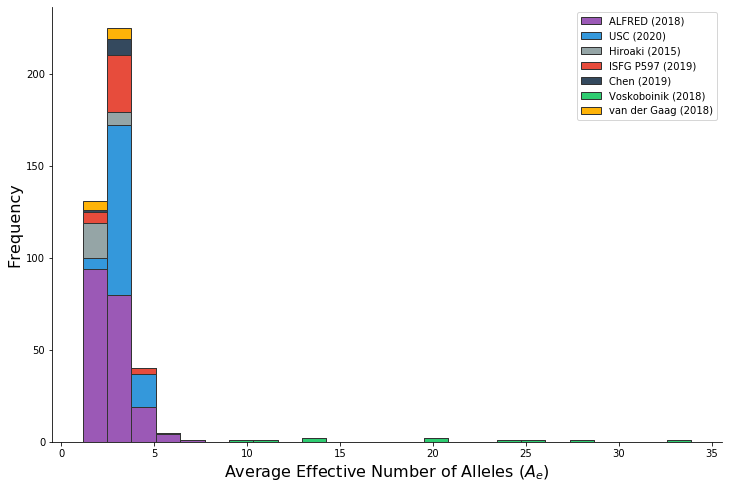

In [36]:
sources = m.Source.unique()
labels = {
    'ALFRED': 'ALFRED (2018)',
    '10.1016/j.fsigen.2019.02.018': 'Chen (2019)',
    '10.1016/j.legalmed.2015.06.003': 'Hiroaki (2015)',
    '10.1016/j.fsigen.2019.102213': 'USC (2020)',
    'ISFG2019:P597': 'ISFG P597 (2019)',
    '10.1016/j.fsigen.2018.05.008': 'van der Gaag (2018)',
    '10.1016/j.fsigen.2018.05.001': 'Voskoboinik (2018)'
}
colors = [
    '#9b59b6',
    '#3498db',
    '#95a5a6',
    '#e74c3c',
    '#34495e',
    '#2ecc71',
    '#feb308',
]
subsets = [m[m.Source == src] for src in sources]
fig = plt.figure(figsize=(12, 8))
fig.patch.set_facecolor('white')
plt.hist([ss.AvgAe for ss in subsets], bins=25, color=colors, edgecolor='#333333', stacked=True, label=[labels[src] for src in sources])
axis = plt.gca()
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)
axis.set_xlabel('Average Effective Number of Alleles ($A_e$)', fontsize=16)
#xticks = (0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5)
#xticklabels = [10 ** n for n in xticks]
#axis.set_xticks(xticks)
#axis.set_xticklabels(xticklabels)
axis.set_ylabel('Frequency', fontsize=16)
axis.legend()
fig.savefig('mh-ae.pdf')

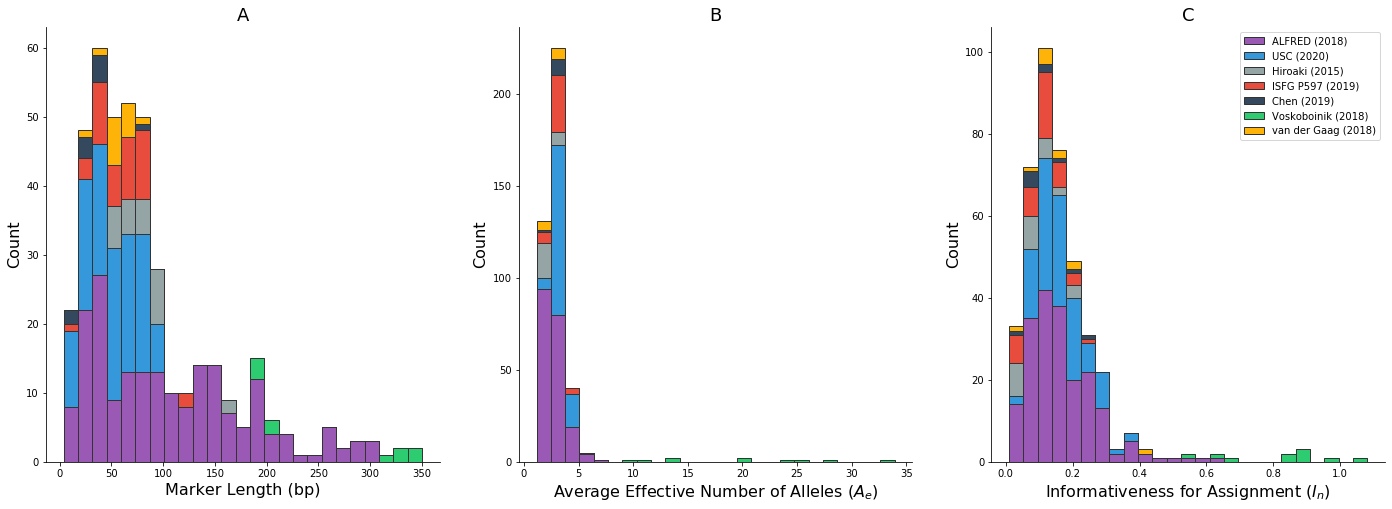

In [46]:
sources = m.Source.unique()
labels = {
    'ALFRED': 'ALFRED (2018)',
    '10.1016/j.fsigen.2019.02.018': 'Chen (2019)',
    '10.1016/j.legalmed.2015.06.003': 'Hiroaki (2015)',
    '10.1016/j.fsigen.2019.102213': 'USC (2020)',
    'ISFG2019:P597': 'ISFG P597 (2019)',
    '10.1016/j.fsigen.2018.05.008': 'van der Gaag (2018)',
    '10.1016/j.fsigen.2018.05.001': 'Voskoboinik (2018)'
}
colors = [
    '#9b59b6',
    '#3498db',
    '#95a5a6',
    '#e74c3c',
    '#34495e',
    '#2ecc71',
    '#feb308',
]
subsets = [m[m.Source == src] for src in sources]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))
fig.patch.set_facecolor('white')

axis = plt.subplot(1, 3, 1)
plt.hist(
    [ss.Length for ss in subsets], color=colors, edgecolor='#333333',
    bins=25, stacked=True, label=[labels[src] for src in sources]
)
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)
axis.set_xlabel('Marker Length (bp)', fontsize=16)
axis.set_ylabel('Count', fontsize=16)
axis.set_title('A', fontsize=18)
#axis.legend()

axis = plt.subplot(1, 3, 2)
plt.hist(
    [ss.AvgAe for ss in subsets], color=colors, edgecolor='#333333',
    bins=25, stacked=True, label=[labels[src] for src in sources]
)
axis = plt.gca()
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)
axis.set_xlabel('Average Effective Number of Alleles ($A_e$)', fontsize=16)
axis.set_ylabel('Count', fontsize=16)
axis.set_title('B', fontsize=18)
#axis.legend()

axis = plt.subplot(1, 3, 3)
plt.hist(
    [ss.In for ss in subsets], color=colors, edgecolor='#333333',
    bins=25, stacked=True, label=[labels[src] for src in sources]
)
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)
axis.set_xlabel('Informativeness for Assignment ($I_n$)', fontsize=16)
axis.set_ylabel('Count', fontsize=16)
axis.set_title('C', fontsize=18)
axis.legend()
fig.savefig('mh-3attr.pdf')

In [49]:
m.describe()

,AvgAe,In,Start,End,Length
count,412.000000,412.000000,4.170000e+02,4.170000e+02,417.000000
mean,3.278895,0.169632,6.404688e+07,6.404697e+07,86.059952
std,3.008697,0.139398,5.510103e+07,5.510104e+07,66.850535
min,1.158200,0.010200,2.479790e+05,2.480360e+05,4.000000
25%,2.328250,0.095200,1.996271e+07,1.996281e+07,41.000000
50%,2.864750,0.138600,4.761846e+07,4.761855e+07,69.000000
75%,3.322100,0.205725,9.939284e+07,9.939290e+07,104.000000
max,33.919000,1.081000,2.406025e+08,2.406025e+08,350.000000


In [48]:
m[m.Length < 100].describe()

,AvgAe,In,Start,End,Length
count,302.000000,302.000000,3.070000e+02,3.070000e+02,307.000000
mean,2.828806,0.139366,6.376658e+07,6.376663e+07,53.074919
std,0.706573,0.080361,5.470233e+07,5.470233e+07,24.364825
min,1.158200,0.010200,2.479790e+05,2.480360e+05,4.000000
25%,2.338975,0.089800,1.996320e+07,1.996328e+07,33.000000
50%,2.895950,0.124100,4.866516e+07,4.866522e+07,50.000000
75%,3.273350,0.177075,9.799179e+07,9.799184e+07,73.000000
max,6.026900,0.642300,2.406025e+08,2.406025e+08,99.000000


In [50]:
307 / 417

0.7362110311750599

In [51]:
m[m.Length < 50].describe()

,AvgAe,In,Start,End,Length
count,144.000000,144.000000,1.450000e+02,1.450000e+02,145.000000
mean,2.812634,0.133542,5.954275e+07,5.954278e+07,31.255172
std,0.580214,0.079869,5.495944e+07,5.495944e+07,11.456912
min,1.162600,0.020100,5.617780e+05,5.618160e+05,4.000000
25%,2.467100,0.084650,1.278889e+07,1.278891e+07,22.000000
50%,2.859850,0.122800,4.444653e+07,4.444655e+07,32.000000
75%,3.169000,0.162950,9.776248e+07,9.776250e+07,42.000000
max,4.554400,0.642300,2.406025e+08,2.406025e+08,49.000000


In [52]:
145 / 417

0.34772182254196643

In [53]:
m[m.AvgAe < 5.0].describe()

,AvgAe,In,Start,End,Length
count,395.000000,395.000000,3.950000e+02,3.950000e+02,395.000000
mean,2.810831,0.151199,6.467579e+07,6.467587e+07,80.339241
std,0.716932,0.089904,5.485929e+07,5.485929e+07,59.361889
min,1.158200,0.010200,2.479790e+05,2.480360e+05,4.000000
25%,2.309950,0.092550,2.030145e+07,2.030156e+07,40.000000
50%,2.820500,0.133800,4.920970e+07,4.920975e+07,67.000000
75%,3.267350,0.195700,9.941048e+07,9.941057e+07,97.000000
max,4.845900,0.642300,2.406025e+08,2.406025e+08,303.000000


In [54]:
395 / 412

0.9587378640776699

In [57]:
m[m.AvgAe > 5.0].sort_values('Source')

,Name,PermID,Reference,Chrom,Offsets,AvgAe,In,Source,Start,End,Length
34,mh02LV-08,MHDBM-7b891c73,GRCh38,chr2,"28567654,28567659,28567662,28567673,28567678,2...",13.9066,0.6344,10.1016/j.fsigen.2018.05.001,28567654,28567844,190
276,mh13LV-10,MHDBM-c831d388,GRCh38,chr13,"70291859,70291862,70291863,70291871,70291875,7...",9.6136,0.5320,10.1016/j.fsigen.2018.05.001,70291859,70292053,194
199,mh10LV-03,MHDBM-e58b05b5,GRCh38,chr10,"16674549,16674557,16674564,16674565,16674607,1...",25.1567,0.8834,10.1016/j.fsigen.2018.05.001,16674549,16674874,325
186,mh09LV-02,MHDBM-46974475,GRCh38,chr9,"126716993,126717000,126717001,126717015,126717...",28.0040,0.9683,10.1016/j.fsigen.2018.05.001,126716993,126717336,343
371,mh20LV-04,MHDBM-ee1a008b,GRCh38,chr20,"5665884,5665895,5665899,5665903,5665905,566590...",24.2601,0.9019,10.1016/j.fsigen.2018.05.001,5665884,5666234,350
141,mh06LV-09,MHDBM-b8f722a9,GRCh38,chr6,"33056354,33056359,33056388,33056400,33056411,3...",10.4354,0.6829,10.1016/j.fsigen.2018.05.001,33056354,33056547,193
64,mh03LV-07,MHDBM-5f7e29b6,GRCh38,chr3,"5783508,5783509,5783518,5783523,5783525,578353...",14.0275,1.0810,10.1016/j.fsigen.2018.05.001,5783508,5783706,198
62,mh03LV-01,MHDBM-75964bf2,GRCh38,chr3,"4567469,4567490,4567512,4567525,4567535,456753...",33.9190,0.8894,10.1016/j.fsigen.2018.05.001,4567469,4567790,321
56,mh02LV-05,MHDBM-d5e37dff,GRCh38,chr2,"173420586,173420600,173420616,173420625,173420...",20.7826,0.8416,10.1016/j.fsigen.2018.05.001,173420586,173420911,325
65,mh03LV-06,MHDBM-a3596593,GRCh38,chr3,"11914400,11914412,11914417,11914424,11914432,1...",20.3159,0.8625,10.1016/j.fsigen.2018.05.001,11914400,11914598,198
